<a href="https://colab.research.google.com/github/FishPain/sure-bo/blob/MiloyBlitz/Missing_Values_%26_Top10_Departments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

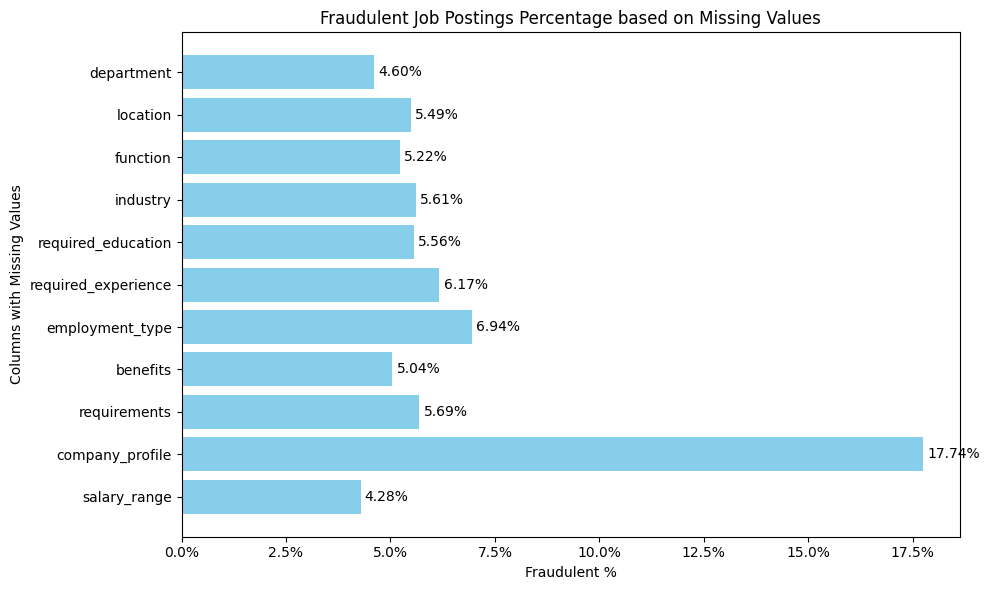

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


df = pd.read_csv("Dataset.csv")
columns_with_missing = ['salary_range','company_profile','requirements','benefits'
                        ,'employment_type','required_experience','required_education','industry','function','location','department']
fraud_percentage_by_missing = {}
df['fraudulent'] = df['fraudulent'].map({'t': True, 'f': False})

for column in columns_with_missing:
    df[f'{column}_missing'] = df[column].isnull()
    fraud_percentage = df.groupby(f'{column}_missing')['fraudulent'].mean()
    fraud_percentage_by_missing[column] = fraud_percentage

fraud_df = pd.DataFrame(fraud_percentage_by_missing)
fraud_df = fraud_df.transpose()

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(fraud_df.index.astype(str), fraud_df[True], color='skyblue')
ax.set_xlabel('Fraudulent %')
ax.set_ylabel('Columns with Missing Values')
ax.set_title('Fraudulent Job Postings Percentage based on Missing Values')

for bar in bars:
    width = bar.get_width()
    ax.annotate('{:.2f}%'.format(width * 100),
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.1f}%'.format(x * 100)))

plt.tight_layout()
plt.show()



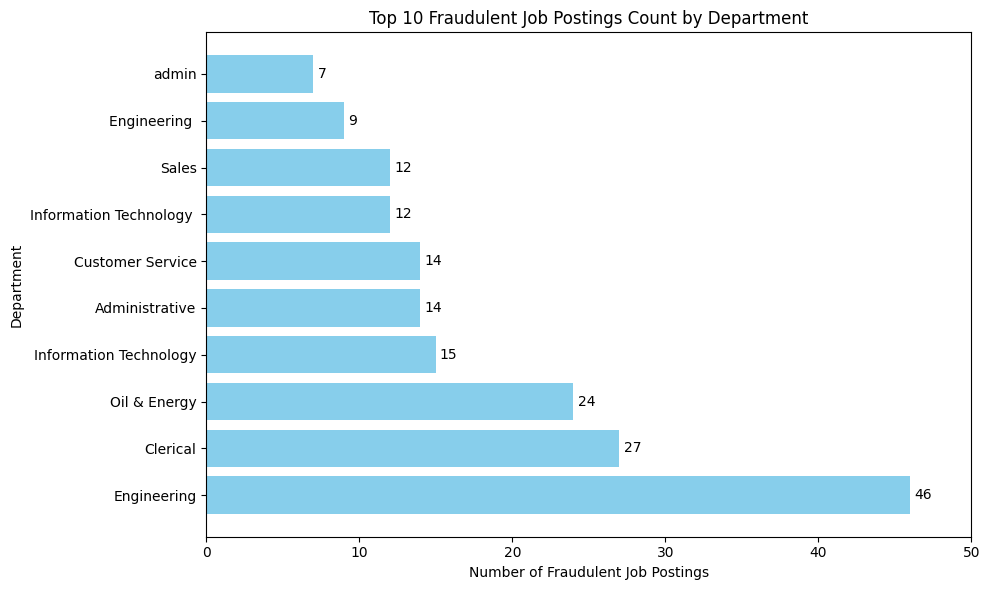

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset.csv")
df['fraudulent'] = df['fraudulent'].map({'t': True, 'f': False})
top_10_fraudulent_departments = df[df['fraudulent'] == True]['department'].value_counts().nlargest(10)


fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_10_fraudulent_departments.index.astype(str), top_10_fraudulent_departments.values, color='skyblue')
ax.set_xlabel('Number of Fraudulent Job Postings')
ax.set_ylabel('Department')
ax.set_title('Top 10 Fraudulent Job Postings Count by Department')
ax.set_xlim(0, 50)

for bar in bars:
    width = bar.get_width()
    ax.annotate('{}'.format(int(width)),
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center')

plt.tight_layout()
plt.show()

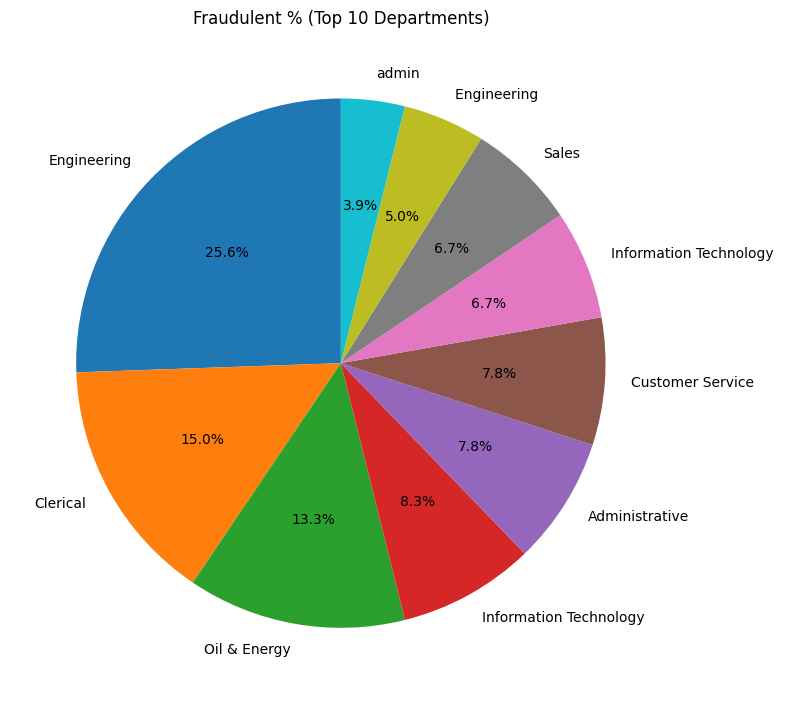

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Dataset.csv")


df['fraudulent'] = df['fraudulent'].map({'t': True, 'f': False})
top_10_fraudulent_departments = df[df['fraudulent'] == True]['department'].value_counts().nlargest(10)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_10_fraudulent_departments.values, labels=top_10_fraudulent_departments.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Fraudulent % (Top 10 Departments)')

plt.tight_layout()
plt.show()

